### HR Prediction 2

In [2]:
#Here we are going to find out what contributes to employees leaving the company

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('HR.txt', sep=",")

data = dataset.copy()


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#You will notice that there is an error with the column sales, I was expecting the column "department". 
#Maybe it was accidentally renamed. Let's see what is in the "sales" column.

sales = data.groupby(by='sales').count()
sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
sales,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [6]:
#I was right, it was renamed. so lets name it "department" now.

data.rename(columns={'sales': 'department'}, inplace=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#Notice in the above table that salary column contains strings(high, medium, low). 
#Let's add another column('Salary2') to the table that will return a number if salary is high(3), medium(2) or low(1).
#and check the describe command.

def salary(row):
    if row['salary'] == 'high':
        return 3
    elif row['salary'] == 'medium':
        return 2
    else:
        return 1
    
data['Salary2'] = data.apply(salary, axis=1)

data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Salary2
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

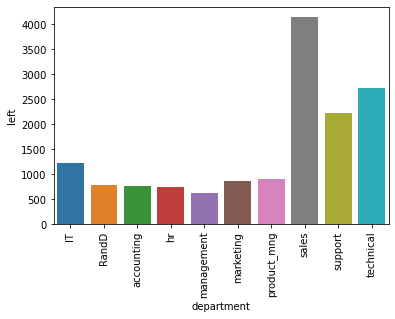

In [8]:
data_group = data.groupby(by=['department'],as_index=False).count()
ax = sns.barplot(x="department", y="left", data=data_group)
plt.xticks(rotation = 90)

<ipython-input-9-9701bf57d675>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

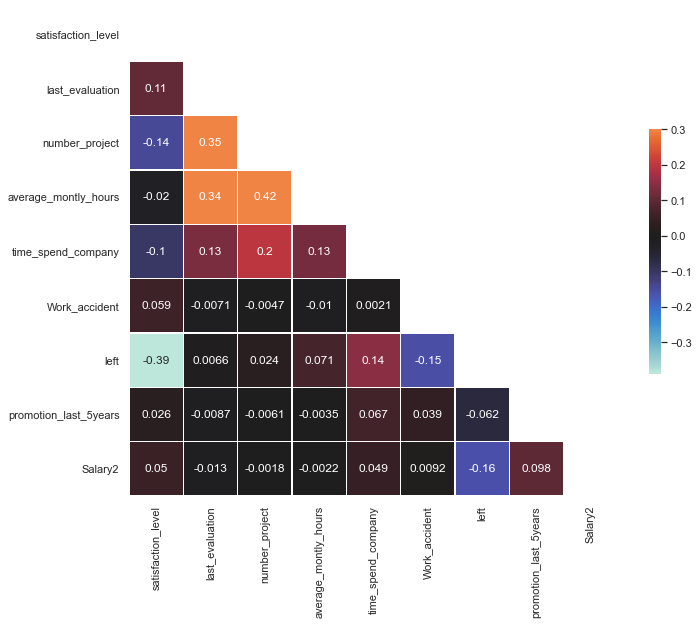

In [9]:
#We See that Sales, Support and Technical Departments have more employees who left the company.
#However, without knowing the total staffing count at the organization,
#this variable isn't too helpful.
#Before we go any further, let's see what is correlated in the dataset.

sns.set(style="white")

corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

vf, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#This correlation matrix tells us that the higher someone is satisfied in their job the less likely they are to leave.
#Time spent with the company is positively correlated with leaving, 
#suggesting the longer someone works for this organization the more likely they are too leave. 
#Another relationship that makes sense is that a higher salary appears to be negatively associated with leaving.
#One correlation in the above matrix doesn't quite make sense. 
#Having had a work accident is negatively related to leaving the company, which doesn't really make intuitive sense. 
#On the surface this doesn't make a whole lot of sense 
#because you would assume that an employee felt unsafe at an organization that they might want to leave.
#For now, let's look closer at the satisfaction level variable, the one with the highest coefficient.

C:\Users\MAFA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


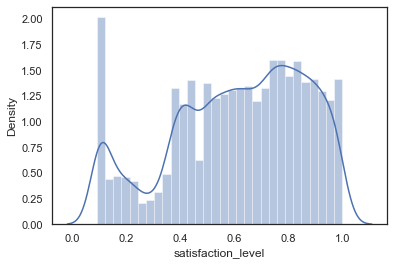

In [10]:
ax = sns.distplot(data['satisfaction_level'])

In [ ]:
#Satisfaction is definitely not normally distributed. 
#You could group the data for additional analyses is based on the histogram above is where the
#bars take a distinctive drop-off.

In [11]:
#I'm going to create a new column and assign qualitative rankings for three(3) Satisfaction levels(High, Medium and Low).
#and add a new column "Sat" to hold the qualitative rankings.

def sat(row):
    if .3 <= row['satisfaction_level'] < .5:
        return 'Medium'
    elif row['satisfaction_level'] >= .5:
        return 'High'
    else:
        return 'Low'

data['Sat'] = data.apply(sat, axis=1)

data_gr = data.groupby(by='Sat',as_index=False).mean()
data_gr.head()

,Sat,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Salary2
0,High,0.748778,0.740814,3.814324,204.656394,3.412154,0.161866,0.098310,0.024386,1.625288
1,Low,0.152213,0.781651,5.291272,236.805468,4.288644,0.117245,0.496845,0.012093,1.538906
2,Medium,0.411455,0.573588,2.703469,161.674375,3.271913,0.096979,0.597538,0.015666,1.515479


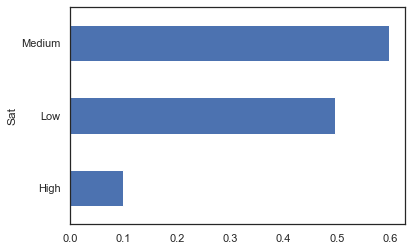

In [12]:
#lets use the Sa


data_group = data.groupby(by=['Sat'])
left_rate = data_group['left'].sum() / data_group['left'].count()
ax = left_rate.plot(kind='barh')

In [ ]:
#Well that's interesting.
#Those with medium satisfaction levels are more likely to leave based on percentage of those who left 
#if we use our three-category breakdown.
#This chart suggests that those who are highly satisfied are the least likely to leave, which makes intuitive sense.

In [13]:
#Now let's check out salary, which is an ordinal, string variable in the original dataset.

data_group = data.groupby(by=['salary'],as_index=False).count()
data_group

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,Salary2,Sat
0,high,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237
1,low,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316
2,medium,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446


In [ ]:
# We see that most people are in the low or medium salary categories. 
#Let's look at the pure count of folks who left in each category.

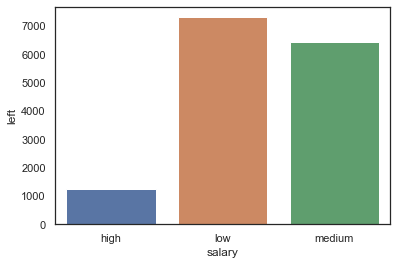

In [14]:
ax = sns.barplot(x="salary", y="left", data=data_group)

In [ ]:
#Now let's look at those who left the company by calculating the percentage or rate.

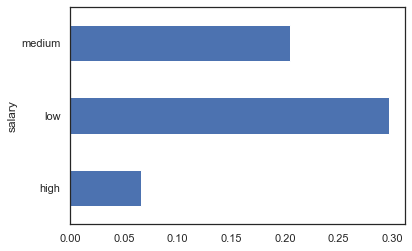

In [15]:
data_group = data.groupby(by=['salary'])
left_rate = data_group['left'].sum() / data_group['left'].count()
ax = left_rate.plot(kind='barh')

In [ ]:
#Salary appears to have a a linear relationship with leaving, 
#with the more money your earn the less likely you are to leave.
#But, let's see if initial analysis suggest any potential interaction effects between
#salary and satisfaction in terms of leaving the employer.

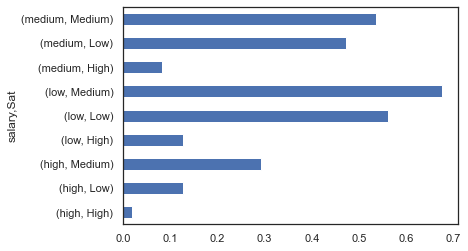

In [16]:
# Set a default value
data_group = data.groupby(by=['salary','Sat'])
left_rate = data_group['left'].sum() / data_group['left'].count()
ax = left_rate.plot(kind='barh')

In [ ]:
#Findings:
#Employees with the highest rate of leaving earns a low salary and reports a medium satisfaction rate.
#Aso Employees with the lowest rate of leaving earns the highest salary and reports the highest satsifaction.